In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
df = pd.read_csv('to_find_age.csv')

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Cabin_letter,title,sex,total_family,SurnameNum,Fare_new
0,22.0,7.2500,0,3,1,0,0,0,1,1,2,1.981001
1,38.0,71.2833,0,1,1,1,1,1,0,1,2,4.266662
2,26.0,7.9250,0,3,0,1,0,2,0,0,1,2.070022
3,35.0,53.1000,0,1,1,1,1,1,0,1,2,3.972177
4,35.0,8.0500,0,3,0,0,0,0,1,0,2,2.085672


In [6]:
missing_age_train = df[df['Age'].notnull()]
missing_age_test = df[df['Age'].isnull()]

In [7]:
missing_age_train.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Cabin_letter,title,sex,total_family,SurnameNum,Fare_new
0,22.0,7.2500,0,3,1,0,0,0,1,1,2,1.981001
1,38.0,71.2833,0,1,1,1,1,1,0,1,2,4.266662
2,26.0,7.9250,0,3,0,1,0,2,0,0,1,2.070022
3,35.0,53.1000,0,1,1,1,1,1,0,1,2,3.972177
4,35.0,8.0500,0,3,0,0,0,0,1,0,2,2.085672


In [8]:
missing_age_train.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived', 'Cabin_letter',
       'title', 'sex', 'total_family', 'SurnameNum', 'Fare_new'],
      dtype='object')

In [9]:
bins = [0, 10, 18, 35, 55, 80]

In [10]:
missing_age_train['Age_category'] = pd.cut(missing_age_train['Age'], bins)

C:\Users\naive\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
missing_age_train['Age_category'] = pd.factorize(missing_age_train['Age_category'])[0]

C:\Users\naive\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
missing_age_train.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Cabin_letter,title,sex,total_family,SurnameNum,Fare_new,Age_category
0,22.0,7.2500,0,3,1,0,0,0,1,1,2,1.981001,0
1,38.0,71.2833,0,1,1,1,1,1,0,1,2,4.266662,1
2,26.0,7.9250,0,3,0,1,0,2,0,0,1,2.070022,0
3,35.0,53.1000,0,1,1,1,1,1,0,1,2,3.972177,0
4,35.0,8.0500,0,3,0,0,0,0,1,0,2,2.085672,0


In [13]:
missing_age_train['Age_category'].value_counts()

0    531
1    263
3    107
2     86
4     59
Name: Age_category, dtype: int64

In [14]:
missing_age_train.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Survived', 'Cabin_letter',
       'title', 'sex', 'total_family', 'SurnameNum', 'Fare_new',
       'Age_category'],
      dtype='object')

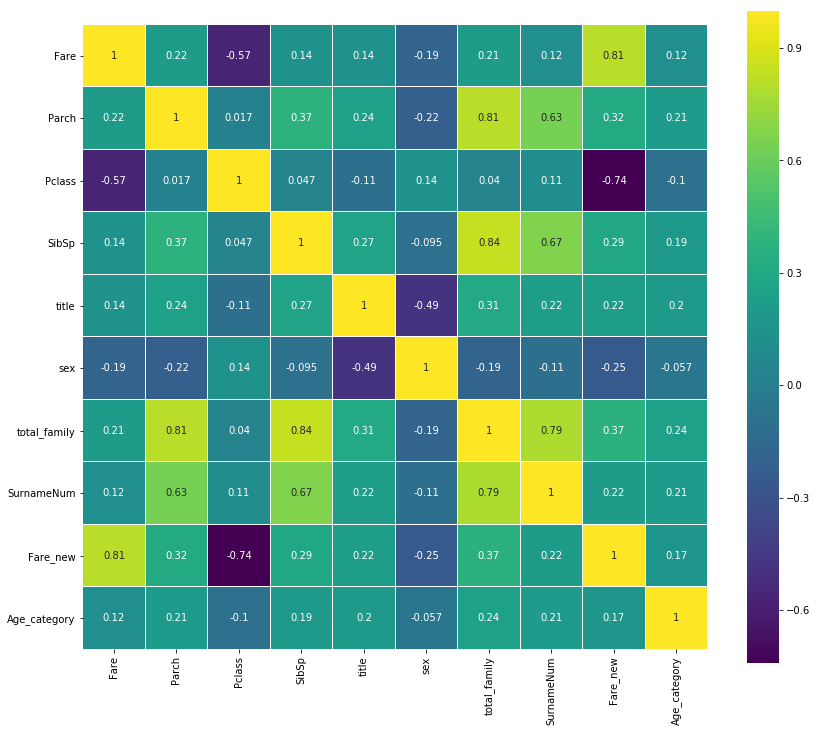

In [15]:
plt.figure(figsize = (14,12))
sns.heatmap(missing_age_train[['Fare', 'Parch', 'Pclass', 'SibSp','title', 'sex', 'total_family', 'SurnameNum', 'Fare_new',
       'Age_category']].corr(), square=True,linewidths = 0.1, linecolor='white', annot=True,cmap=plt.cm.viridis)

In [15]:
X_train = missing_age_train[['Parch', 'Pclass', 'SibSp',
       'title', 'sex', 'total_family', 'SurnameNum', 'Fare_new']]
y_train = missing_age_train['Age_category']

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

In [19]:
RF_para_grid = {'n_estimators' : [200, 300, 400,500,700,800,1100,1200], 
                'criterion': ['entropy'],
                'max_depth' : [6, 8, 9,11,12,13],
                'max_features': ['auto',4,5,6]}

In [20]:
RFC = RandomForestClassifier(random_state=42)
RF_Grid = GridSearchCV(RFC, RF_para_grid, cv=5, n_jobs=5, verbose=1, scoring = 'accuracy')
RF_Grid.fit(X_train, y_train)
RF_Model_Result = pd.DataFrame(RF_Grid.cv_results_)
RF_Model_Result.sort_values('rank_test_score', axis=0, ascending=True, inplace=True)
RF_Model_Result = RF_Model_Result[['params', 'rank_test_score', 'mean_test_score', 'mean_train_score']]
RF_Model_Result.to_csv('RF_Age.csv')
joblib.dump(RF_Grid.best_estimator_, 'RF_BEST_AGE3.pkl')

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   10.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   49.7s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  4.2min
[Parallel(n_jobs=5)]: Done 960 out of 960 | elapsed:  5.2min finished
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kw

['RF_BEST_AGE3.pkl']

In [21]:
pd.Series(RF_Grid.best_estimator_.predict(X_train)).value_counts()

0    680
1    231
2     97
3     30
4      8
dtype: int64

The following method of filling the age comes from Kaggle Kernel, which has been proven to be a easy and usrful method.

In [16]:
def newage (cols):
    title = cols['title']
    Sex = cols['sex']
    Age = cols['Age']
    if pd.isnull(Age):
        if title==3 and Sex==1:
            return 4.57
        elif title == 2 and Sex == 0:
            return 21.8
        elif title== 0 and Sex == 1: 
            return 32.37
        elif title == 1 and Sex == 0:
            return 35.72
        elif title == 5 and Sex == 0:
            return 49
        elif title == 5 and Sex == 1:
            return 46.56
        elif title == 4 and Sex == 0:
            return 40.50
        else:
            return 42.33
    else:
        return Age

In [19]:
df['Age'] = df.apply(lambda col : newage(col), axis=1)

In [22]:
df.to_csv('full_data1.csv')

In [27]:
XGB_para_grid = {
              'objective':['multi:softprob'],
              'learning_rate': [0.01,1], #so called `eta` value
              'max_depth': [5,7,9,11],
              'min_child_weight': [8,9,11,12],
              'colsample_bytree': [0.7],
              'n_estimators': [300, 500,700,900,1100] #number of trees, change it to 1000 for better results
              }

In [28]:
from xgboost import XGBClassifier
import xgboost as xgb

In [29]:
xgb_classifier = xgb.XGBClassifier(random_state = 0)
xgb_grid = GridSearchCV(xgb_classifier, XGB_para_grid, cv = 5, n_jobs = 5, scoring = 'accuracy' )
xgb_grid.fit(X_train, y_train)
xgb_result = pd.DataFrame(xgb_grid.cv_results_)
xgb_result.sort_values('rank_test_score', axis=0, ascending=True, inplace=True)
xgb_result = xgb_result[['params', 'rank_test_score', 'mean_test_score', 'mean_train_score']]
xgb_result.to_csv('xgb_Age_result.csv')
joblib.dump(xgb_grid.best_estimator_, 'XGB_BEST_AGE3.pkl')

C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\naive\Anaconda3\lib\site-packages\sklearn\util

['XGB_BEST_AGE3.pkl']